In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import glob
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import category_encoders as ce
import pandas_profiling as pp
from sklearn.metrics import accuracy_score, f1_score
# Import the nltk package
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download("punkt")
# NLTK Stop words
from nltk.corpus import stopwords
pd.options.display.max_columns = 500 
pd.options.display.max_rows = 500
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.max_seq_items = 2000

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:

def category_name(path):
    with open(path) as json_file:  
        data = json.load(json_file)
    category_info_list=[]
    for row in data['items']:
        id_info=row['id']
        category_name=row['snippet']['title']
        categoty_info=(id_info ,category_name)
        category_info_list.append(categoty_info)
    return(dict(category_info_list))

In [3]:
def missplot(df):
  df.isna().sum().plot.bar(figsize=(16,6), color='red')
  plt.title(f'Count of Missing Values per {df} Column ')
  plt.ylabel('Counts')
  plt.show()

In [4]:
path = "D:\DATASETS\youtube-new\\"
for name in glob.glob(path+'*.*'):
    print(name)

D:\DATASETS\youtube-new\CAvideos.csv
D:\DATASETS\youtube-new\CA_category_id.json
D:\DATASETS\youtube-new\DEvideos.csv
D:\DATASETS\youtube-new\DE_category_id.json
D:\DATASETS\youtube-new\FRvideos.csv
D:\DATASETS\youtube-new\FR_category_id.json
D:\DATASETS\youtube-new\GBvideos.csv
D:\DATASETS\youtube-new\GB_category_id.json
D:\DATASETS\youtube-new\GoogleYoutubeClassification.pdf
D:\DATASETS\youtube-new\INvideos.csv
D:\DATASETS\youtube-new\IN_category_id.json
D:\DATASETS\youtube-new\JPvideos.csv
D:\DATASETS\youtube-new\JP_category_id.json
D:\DATASETS\youtube-new\KRvideos.csv
D:\DATASETS\youtube-new\KR_category_id.json
D:\DATASETS\youtube-new\MXvideos.csv
D:\DATASETS\youtube-new\MX_category_id.json
D:\DATASETS\youtube-new\RUvideos.csv
D:\DATASETS\youtube-new\RU_category_id.json
D:\DATASETS\youtube-new\USvideos.csv
D:\DATASETS\youtube-new\US_category_id.json


In [5]:
us = pd.read_csv(path +'USvideos.csv')
canada = pd.read_csv(path +'CAvideos.csv')
gbritain = pd.read_csv(path +'GBvideos.csv')
print(us.shape)
print(canada.shape)
print(gbritain.shape)

(40949, 16)
(40881, 16)
(38916, 16)


In [6]:
us.video_id.value_counts()[:20]

j4KvrAUjn6c    30
MAjY8mCTXWk    29
NBSAQenU2Bk    29
r-3iathMo7o    29
iILJvqrAQ_w    29
QBL8IRJ5yHU    29
8h--kFui1JA    29
t4pRQ0jn23Q    29
mdWcaWBxxcY    28
2PH7dK6SLC8    28
ulNswX3If6U    28
vjSohj-Iclc    28
UfKmSfgFxi8    28
6S9c5nnDd_s    28
WIV3xNz8NoM    28
YI3tsmFsrOg    28
0zZ0Y_UZRBw    27
BspHjvU11y4    27
6SuMbFuKDf8    27
TjXQzRWmb_I    27
Name: video_id, dtype: int64

In [7]:
us[us.video_id == 'j4KvrAUjn6c']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34550,j4KvrAUjn6c,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,4696,10705,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! TIX ON SALE NOW!! https://www.d...
34752,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
34901,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77378,12160,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
34966,j4KvrAUjn6c,18.16.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",4862649,90451,14792,18035,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35180,j4KvrAUjn6c,18.17.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",5665445,101461,16170,19395,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35396,j4KvrAUjn6c,18.18.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",6290796,110373,17131,20365,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35600,j4KvrAUjn6c,18.19.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",6773604,116508,17787,20941,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
35804,j4KvrAUjn6c,18.20.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7204004,121673,18323,21459,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
36035,j4KvrAUjn6c,18.21.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7512530,125317,18633,21812,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...
36245,j4KvrAUjn6c,18.22.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",7740671,128377,18901,22052,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...


In [8]:
canada[canada.video_id == 'j4KvrAUjn6c']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34520,j4KvrAUjn6c,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,4696,10705,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! TIX ON SALE NOW!! https://www.d...
34698,j4KvrAUjn6c,18.15.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",3906727,77379,12161,15874,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,BEST MOM EVER! WANT TO SEE US IN NYC & NJ?!BUY...


In [9]:
us_category_ids = category_name(path+"US_category_id.json")
canada_category_ids = category_name(path+"CA_category_id.json")
gb_category_ids = category_name(path+"GB_category_id.json")

In [10]:
#US labels
category_list=us_category_ids
category_names=[]
for i in us.category_id:
    category_name=category_list.get(str(i))
    category_names.append(category_name)

us['category_names']=category_names


In [11]:
#Canada labels
category_list=canada_category_ids
category_names=[]
for i in canada.category_id:
    category_name=category_list.get(str(i))
    category_names.append(category_name)

canada['category_names']=category_names

In [12]:
#Great Britain Labels
category_list=gb_category_ids
category_names=[]
for i in gbritain.category_id:
    category_name=category_list.get(str(i))
    category_names.append(category_name)

gbritain['category_names']=category_names

In [13]:
#combine the countries
df =pd.concat([canada, us, gbritain])
df.shape

(120746, 17)

In [14]:
#Check for duplicates betweeen the countries trending videos
df.video_id.value_counts()[:20]

8h--kFui1JA    70
VYOjWnS4cMY    69
vjSohj-Iclc    65
UUkn-enk2RU    64
zxwfDlhJIpw    64
l884wKofd54    64
CX11yw6YL1w    63
5GHXEGz3PJg    63
ffxKSjUwKdU    61
pFc6I0rgmgY    61
BspHjvU11y4    61
i5qOzqD9Rms    61
tJfDBSWYqU8    61
6SuMbFuKDf8    60
vjI4Alon-3Q    59
u_C4onVrr8U    59
iWZmdoY1aTE    58
M4ZoCHID9GI    57
KUUjtUP2CrE    57
mdWcaWBxxcY    57
Name: video_id, dtype: int64

In [15]:
#Are all of the duplicates labeled the same?
df[df.video_id == '8h--kFui1JA']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_names
33763,8h--kFui1JA,18.10.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",641944,72641,1133,4357,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music
33954,8h--kFui1JA,18.11.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",2174315,148689,3725,7907,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music
34181,8h--kFui1JA,18.12.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",3117295,184871,4470,8916,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music
34443,8h--kFui1JA,18.13.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",3974218,209155,4934,9619,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music
33750,8h--kFui1JA,18.10.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",641944,72641,1133,4357,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music
33952,8h--kFui1JA,18.11.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",2174315,148686,3725,7907,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music
34164,8h--kFui1JA,18.12.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",3117295,184871,4470,8916,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music
34379,8h--kFui1JA,18.13.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",3974218,209148,4933,9624,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music
34814,8h--kFui1JA,18.15.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",5303674,235414,5767,10359,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music
35022,8h--kFui1JA,18.16.05,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,10,2018-05-09T17:00:00.000Z,"Sam|""Smith""|""Pray""|""Capitol""|""Pop""",6126929,246832,6077,10507,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,"Stream, Download and Listen to Pray feat. Logi...",Music


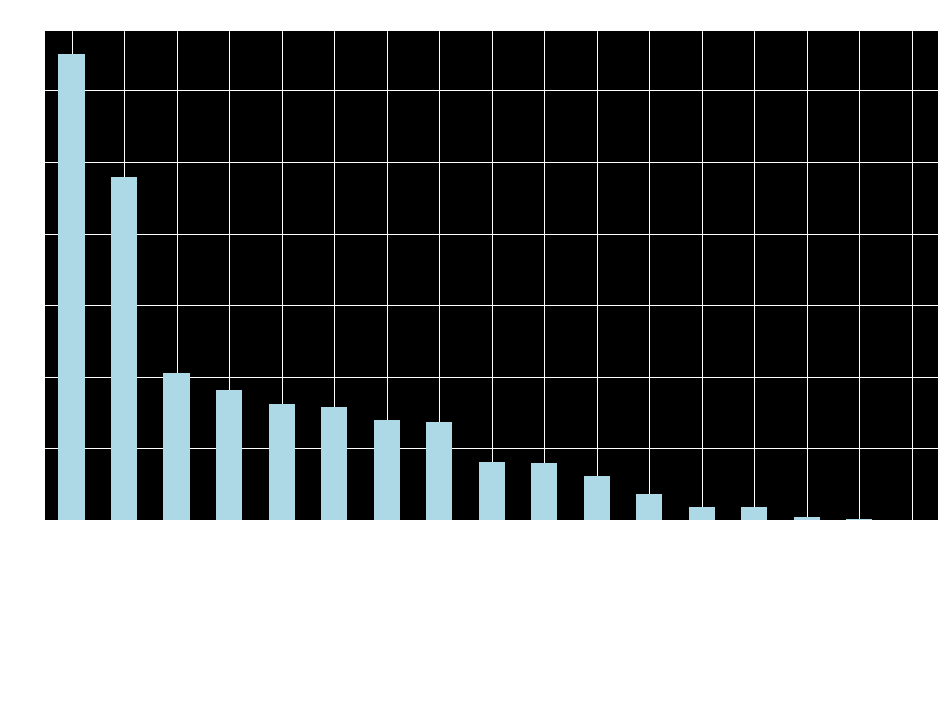

In [16]:
#Combined Target Values for the dataframe
fig = plt.figure(figsize=(16,9))
plt.style.use('dark_background')
plt.title("Target Label Totals : YouTube Trending Videos", fontsize=25)
plt.xticks(fontsize=18)
df['category_names'].value_counts().plot.bar(color='lightblue')
plt.show();

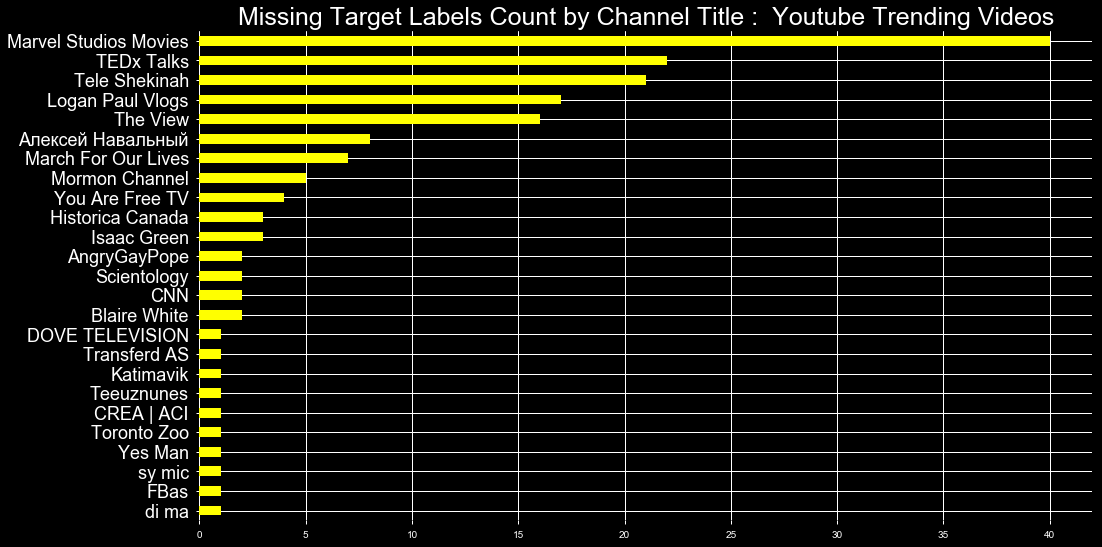

In [17]:
plt.figure(figsize=(16,9))
plt.style.use('dark_background')
plt.title("Missing Target Labels Count by Channel Title :  Youtube Trending Videos", fontsize=25)
plt.yticks(fontsize=18)
df[df.category_names.isna()].channel_title.value_counts().sort_values().plot.barh(color="yellow");

In [18]:
#pp.ProfileReport(df)

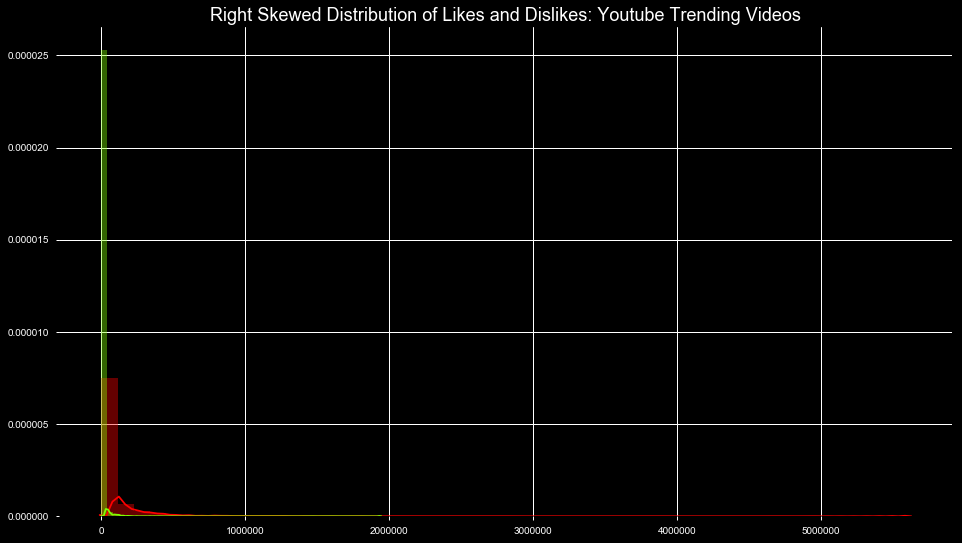

In [19]:
plt.figure(figsize=(16,9))
ax = plt.subplot(111)
plt.style.use('dark_background')
plt.title("Right Skewed Distribution of Likes and Dislikes: Youtube Trending Videos", fontsize=18)
plt.xticks(np.arange(0, 6000000, 1000000))
sns.distplot(df.likes, axlabel=False, color='red')
sns.distplot(df.dislikes,axlabel=False, color='chartreuse');

In [20]:
#What is the baseline accuracy if we guess the majority class everytime?

y_train = df['category_names']
y_train.value_counts(normalize=True)

Entertainment           0.2698
Music                   0.1987
People & Blogs          0.0849
Comedy                  0.0751
Howto & Style           0.0670
News & Politics         0.0653
Film & Animation        0.0579
Sports                  0.0570
Science & Technology    0.0338
Gaming                  0.0327
Education               0.0257
Pets & Animals          0.0151
Travel & Events         0.0074
Autos & Vehicles        0.0073
Shows                   0.0017
Nonprofits & Activism   0.0005
Movies                  0.0000
Name: category_names, dtype: float64

In [21]:
def wrangle(X):

    '''Function to preprocess/wrangle data into a usable form'''
    
    X = X.copy()
    
    #Print our original shape to compare after the function
    
    print(f'Before Wrangle Dataframe Shape: {X.shape}')
           
    #drop duplicate rows between 
    
    X = X.drop_duplicates(['video_id'], keep='first')
    
    #If the video was removed or errored we are not interested
    #in using it to train or evaulate on 
    
    X = X[X.video_error_or_removed == False]
    
    #We only want the correctly labeled data to train and evaluate
    
    X = X[X['category_names'].isna() == False]

    X = X.drop(columns=[
    'video_id','publish_time','likes','dislikes',
    'thumbnail_link','video_error_or_removed',
    'trending_date','category_id','views','comment_count'])

    X["title_cleaned"] = X["title"].str.lower()
    X["title_cleaned"] = X["title_cleaned"].str.replace(r'[^\w\s]+', '')

    X["description_cleaned"] = X["description"].str.lower()
    X["description_cleaned"] = X["description_cleaned"].str.replace(r'[^\w\s]+', '')

    X["tags_cleaned"] = X["tags"].str.lower()
    X["tags_cleaned"] = X["tags_cleaned"].str.replace(r'[^\w\s]+', '')
    X['tags_cleaned'] = X['tags_cleaned'].str.replace("|"," ")
    X['tags_cleaned'] = X['tags_cleaned'].str.replace('\"',' ')
    
    X = X.drop(columns=["tags","description","title"])
    X = X.rename(columns={'title_cleaned':'title', 'description_cleaned':'description',
                'tags_cleaned':'tags'})
    
    #fill na values for descriptions

    X['description'] = X["description"].fillna("MISSING")
   
    print(f'New Dataframe Shape: {X.shape}')
    print(f'The columns left are:\n{X.columns.tolist()}')
    print(f'The NAN values are:\n{X.isna().sum()}')
    
    #reset the index numbers so that there are no duplicates
    
    X = X.reset_index(drop=True)
    
    return X


In [22]:
df = wrangle(df)

Before Wrangle Dataframe Shape: (120746, 17)
New Dataframe Shape: (30246, 7)
The columns left are:
['channel_title', 'comments_disabled', 'ratings_disabled', 'category_names', 'title', 'description', 'tags']
The NAN values are:
channel_title        0
comments_disabled    0
ratings_disabled     0
category_names       0
title                0
description          0
tags                 0
dtype: int64


In [23]:
document_lengths = np.array(list(map(len, df['description'].str.split(' '))))

print("The average number of words in a video description is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a video description is: {}.".format(min(document_lengths)))
print("The maximum number of words in a video description is: {}.\n".format(max(document_lengths)))

document_lengths2 = np.array(list(map(len, df['title'].str.split(' '))))

print("The average number of words in a video title is: {}.".format(np.mean(document_lengths2)))
print("The minimum number of words in a video title is: {}.".format(min(document_lengths2)))
print("The maximum number of words in a video title is: {}.\n".format(max(document_lengths2)))


document_lengths3 = np.array(list(map(len, df['tags'].str.split(' '))))

print("The average number of words in a video tags is: {}.".format(np.mean(document_lengths3)))
print("The minimum number of words in a video tags is: {}.".format(min(document_lengths3)))
print("The maximum number of words in a video tags is: {}.\n".format(max(document_lengths3)))

The average number of words in a video description is: 108.32688619982808.
The minimum number of words in a video description is: 1.
The maximum number of words in a video description is: 1124.

The average number of words in a video title is: 9.370131587647954.
The minimum number of words in a video title is: 1.
The maximum number of words in a video title is: 30.

The average number of words in a video tags is: 18.048171659062355.
The minimum number of words in a video tags is: 1.
The maximum number of words in a video tags is: 87.



## Can extract some information to help categorize the data?

In [24]:
#The labels for our data and the counts for comparison later
df.category_names.value_counts()

Entertainment            9722
News & Politics          3415
People & Blogs           3071
Music                    2475
Sports                   2421
Comedy                   2304
Howto & Style            1779
Film & Animation         1429
Gaming                    966
Science & Technology      900
Education                 763
Pets & Animals            325
Autos & Vehicles          309
Travel & Events           247
Shows                     106
Nonprofits & Activism      13
Movies                      1
Name: category_names, dtype: int64

## Do some word association

In [25]:
# this is where a synonym word bank file or category corpus could better
#speed up and extended the abilities

In [26]:
music_words = ['music','song, punjabi',
               'musicvideo','artist','rap',
               'rock','country','listen']
for word in music_words:
    df['music_tag'] = df['description'].str.contains(word)
                    
ent_words = ['entertainment','entertain']
for word in ent_words:
    df['ent_tag'] = df['description'].str.contains(word)
    
pol_words = [
    'politics','republican','democrat','news','world'
    'white house','headlines','immigration'
    'trump','president','congress','senate', 'press']
for word in pol_words:
    df['pol_tag'] = df['description'].str.contains(word)

blog_words =['blog','vlog','diary']
for word in blog_words:
    df['blog_tag'] = df['description'].str.contains(word)
    
sport_words =  ['sports','basketball','football',
                'baseball','soccer','score']
for word in sport_words:
    df['sport_tag'] = df['description'].str.contains(word)

com_words =  ['comedy','snl','funny','laugh','lol','vine']
for word in com_words:
    df['com_tag'] = df['description'].str.contains(word)

style_words = [
    'style','fashion','clothes','clothing',
    'makeup','designer','']
for word in style_words:
    df['style_tag'] = df['description'].str.contains(word)

anim_words = ['cartoon','pixar','animation','animated','anime']
for word in anim_words:
    df['anim_tag'] = df['description'].str.contains(word)

gam_words =['gamer','playstation','walkthrough','nintendo','fortnite','fps']
for word in gam_words:
    df['game_tag'] = df['description'].str.contains(word)

sci_words = ['science','theory','technology','scientist','scientists']   
for word in sci_words:
    df['sci_tag'] = df['description'].str.contains(word)

edu_words = ['education','school','teacher','college','exam']   
for word in edu_words:
    df['edu_tag'] = df['description'].str.contains(word)

pet_words = ['pet','pets','animal','dog','cat']
for word in pet_words:
    df['pet_tag'] = df['description'].str.contains(word)

auto_words = ['auto','car','race','wheel','tire','tesla']
for word in auto_words:
    df['auto_tag'] = df['description'].str.contains(word)
    
trav_words = ['vacation','tour','travel','traveler','destination','vaca']
for word in trav_words:
    df['trav_tag'] = df['description'].str.contains(word)
    
mov_words = ['movie', 'movies','film','actor','actress','sundance','cinema']
for word in mov_words:
    df['movie_tag'] = df['description'].str.contains(word)
    
sho_words = ['tv','series','episode','e1','show','miniseries']
for word in sho_words:
    df['show_tag'] = df['description'].str.contains(word)
    
char_words = [
    'charity','nonprofit','cause','donation',
    'poverty','starving','shelter']
for word in char_words:
    df['charity_tag'] = df['description'].str.contains(word)


In [27]:
#lets look at the top three labels counts
print(f'Entertainment Tags {len(df[df.ent_tag == True])}')
print(f'Politics Tags {len(df[df.pol_tag == True])}')
print(f'Blog Tags {len(df[df.blog_tag == True])}')

Entertainment Tags 2173
Politics Tags 1472
Blog Tags 17


## CountVectorize the Description Feature for Category Extraction

### CountVectorizer 

In [28]:
words = pd.DataFrame(pd.Series(' '.join(df['description']).split()).value_counts()[:100])

In [29]:
# NLTK Stop words

words = words.reset_index()
words = words.rename(columns={"index":"word", "0":"count"})

stop_words = stopwords.words('english')
stop_words.extend([
    'from', 'subject', 're', 'edu', 'use',
    'follow', 'http', 'www', 'facebook',
    'instagram','twitter', 'youtube',
    'channel','subscribe','video',
    'subscribers', 'like'
])
#What other words may have little value from the top 100?
tops = list(set(words.word)-set(stop_words))
#Add them to the list of words to exclude
stop_words.extend(tops)

In [30]:

tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, #the word is ignored if in more than 80% of corpus
                                min_df = 5) #the word shows up in a minimum of 5 times of corpus

dtm_tf = tf_vectorizer.fit_transform(df['description'])

dtm_feature_names = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape for description: {}'.format(dtm_tf.shape))


Document Term Matrix Shape for description: (30246, 85142)


### There are 17 distinct target categories to predict, so starting with this in the LDA Model appears logical

In [31]:
n_topics = 17
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_tf.fit(dtm_tf)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=17, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [32]:
#Top 10 words for each Category 
def print_top_words(model, feature_names, n_top_words=10):
    
    '''prints the top 10 words from LDA topics'''
    
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [33]:

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda_tf, tf_feature_names)


Topics in LDA model:
Topic #0: song punjabi priyamanaval ufc entertainment serial songs mr directed find
Topic #1: et le les en pour sur des cbc un que
Topic #2: crime 2017 film awards album top patrol social movie man
Topic #3: im link know dont code see young links go made
Topic #4: msnbc vs night hum netflix nbc drama seth hd real
Topic #5: cbs stephen movie colbert episodes stephen colbert stars pm click access
Topic #6: missing des troom un blagues du en une les et
Topic #7: food street street food corden james national của delicious những và
Topic #8: via warner chappell warner chappell via warner nba fine react iphone podcast
Topic #9: الحلقة مسلسل من البيت مسلسل البيت الكبير البيت الكبير من مسلسل عشر tmz
Topic #10: kimmel jimmy jimmy kimmel voice trump president comedy tom movie tweets
Topic #11: rani vaani family awards tamil film india children wwe fox
Topic #12: tonight jimmy life troom fallon jimmy fallon copyright starring please funny
Topic #13: mehta taarak today tapu j

In [34]:
# Extract Topic Distributions from LDA model for each video
col_names = ["Desc. Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf.transform(dtm_tf)
topic_df = pd.DataFrame(topic_dist, columns = col_names)

# Join topic dataframe with numerical features from Method #1
df2 = pd.concat([df, topic_df], axis=1)

#check the shape vs the old one
print(f'Original Dataframe Shape: {df.shape}')
print(f'New Dataframe Shape: {df2.shape}\n')


Original Dataframe Shape: (30246, 24)
New Dataframe Shape: (30246, 41)



In [35]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()



In [36]:
# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            x       y  topics  cluster    Freq
topic                                         
3     -0.1339  0.0693       1        1 15.3728
2     -0.1032  0.0420       2        1  7.6843
12    -0.1052  0.0802       3        1  7.6842
16    -0.0962  0.0524       4        1  5.9770
11     0.0894 -0.3630       5        1  5.9696
4     -0.0669  0.0196       6        1  5.7099
8     -0.0146 -0.0048       7        1  5.4690
1      0.1981  0.1193       8        1  5.3057
10    -0.0202 -0.0466       9        1  5.1854
5     -0.0416 -0.0030      10        1  4.9453
7     -0.0174  0.0071      11        1  4.9142
13    -0.0117 -0.0603      12        1  4.9094
14    -0.0875  0.0378      13        1  4.7159
15     0.1128  0.0302      14        1  4.6171
0     -0.0577  0.0071      15        1  4.0473
9      0.0464 -0.1212      16        1  3.8883
6      0.3093  0.1340      17        1  3.6047, topic_info=      Category      Freq                                               Term  \
42070  Default 2478.0000                                              jimmy   
81039  Default 1825.0000                                             الحلقة   
82977  Default 1827.0000                                              مسلسل   
83054  Default 1838.0000                                                 من   
19679  Default 2184.0000                                                 et   
43562  Default 1621.0000                                             kimmel   
80918  Default 1414.0000                                              البيت   
50556  Default 1529.0000                                              msnbc   
82981  Default 1319.0000                                        مسلسل البيت   
81292  Default 1327.0000                                             الكبير   
80919  Default 1283.0000                                       البيت الكبير   
16017  Default 1651.0000                                                des   
83081  Default 1249.0000                                           من مسلسل   
73966  Default 1594.0000                                              troom   
10192  Default 1472.0000                                                cbs   
49644  Default 1279.0000                                            missing   
42078  Default 1214.0000                                       jimmy kimmel   
45072  Default 1541.0000                                                les   
44708  Default 1278.0000                                                 le   
18870  Default 1386.0000                                                 en   
61338  Default 1175.0000                                               rani   
75113  Default 1352.0000                                                 un   
22377  Default 2166.0000                                               food   
70339  Default 1464.0000                                                sur   
74085  Default 1787.0000                                              trump   
59259  Default 1241.0000                                               pour   
52913  Default 2536.0000                                              night   
76285  Default 1643.0000                                                via   
77179  Default 2291.0000                                                 vs   
52330  Default  969.0000                                                nfl   
50932   Topic1  614.5444                                           mythical   
74552   Topic1  565.0217                                              turks   
79767   Topic1  565.0217                                        young turks   
10335   Topic1  499.3284                                               cenk   
4266    Topic1  495.2858                                                ant   
75891   Topic1  402.3045                                              uygur   
10336   Topic1  401.2938                                         cenk uygur   
50941   Topic1  291.1312                                      

### Title Category Vectorized

#### Again lets see what our word bank of top frequency for this feature can show us

In [37]:
words_title = pd.DataFrame(pd.Series(' '.join(df['title']).split()).value_counts()[:100])
words_title = words_title.reset_index()
words_title = words_title.rename(columns={"index":"word", "0":"count"})
stop_wordz = stopwords.words('english')
topz = list(set(words_title.word)-set(stop_wordz))
#Add them to the list of words to exclude
stop_wordz.extend([
     '2018','10','2017','7',
    'la','2','1','6','4','5',
     '3','video'

])
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_wordz,
                                max_df = 0.6, #the word is ignored if in more than 60% of corpus
                                min_df = 2) #the word shows up in a minimum of 2 observations

dtm_tf_title  = tf_vectorizer.fit_transform(df['title'])

dtm_feature_names_title = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape for description: {}'.format(dtm_tf.shape))

Document Term Matrix Shape for description: (30246, 85142)


#### Since these words exist in the title of the Videos and thus have more correlation to the actual categories they would have to be "cherry picked" instead of automated for removal where they may be redundant. Since the goal is to have a autonomous system of video categorization via the model if this were t be succesful as a cyclical train, predict, update paradigm it would be futile to hand pick terms now. Instead, opting for generic removals  without blindly using the set differences is optimal.
#### The choice to remain using 17 topics as the target is conceptually, there may be a consistency bonus between the features by doing so. If in one feature the model designates the topic more than another either the title topic will reinforce that probability or balance it by pulling it in another destinct class for the trees later to divide. At least that is the hope.

In [38]:
n_topics = 17
lda_tf_title = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf_title.fit(dtm_tf_title)
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda_tf_title, tf_feature_names)


Topics in LDA model:
Topic #0: fortnite les trump de live hacks des battle got like
Topic #1: episode rani ரண vaani vaani rani vaani rani episode வண வண ரண ரண vs
Topic #2: official music audio official music ft live official audio new love feat
Topic #3: full episode ep full episode star makeup wars crime patrol star wars
Topic #4: life trump first real make trumps makes jimmy get justin
Topic #5: episode drama paul juan digital logan ary ary digital digital drama logan paul
Topic #6: kids game trump joe react msnbc morning test taste vs
Topic #7: vs game highlights nba game highlights full full game season 201718 cavaliers
Topic #8: official teaser react episode netflix youtube best doki الحلقة watch
Topic #9: episode tv promo top season drama big american podcast hum
Topic #10: news super trump breaking bowl super bowl episode race president time
Topic #11: الحلقة مسلسل james first espn take lebron royal meghan season
Topic #12: trailer official official trailer hd trump street food 

In [39]:
# Extract Topic Distributions from LDA model for each video
col_names = ["Title_Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf_title.transform(dtm_tf_title)
topic_df_title = pd.DataFrame(topic_dist, columns = col_names)

# Join topic dataframe with numerical features from Method #1
df3 = pd.concat([df2, topic_df_title], axis=1)
print(f'Original Dataframe Shape: {df2.shape}')
print(f'New Dataframe Shape: {df3.shape}\n')
df3.head()

Original Dataframe Shape: (30246, 41)
New Dataframe Shape: (30246, 58)



,channel_title,comments_disabled,ratings_disabled,category_names,title,description,tags,music_tag,ent_tag,pol_tag,blog_tag,sport_tag,com_tag,style_tag,anim_tag,game_tag,sci_tag,edu_tag,pet_tag,auto_tag,trav_tag,movie_tag,show_tag,charity_tag,Desc. Topic 0,Desc. Topic 1,Desc. Topic 2,Desc. Topic 3,Desc. Topic 4,Desc. Topic 5,Desc. Topic 6,Desc. Topic 7,Desc. Topic 8,Desc. Topic 9,Desc. Topic 10,Desc. Topic 11,Desc. Topic 12,Desc. Topic 13,Desc. Topic 14,Desc. Topic 15,Desc. Topic 16,Title_Topic 0,Title_Topic 1,Title_Topic 2,Title_Topic 3,Title_Topic 4,Title_Topic 5,Title_Topic 6,Title_Topic 7,Title_Topic 8,Title_Topic 9,Title_Topic 10,Title_Topic 11,Title_Topic 12,Title_Topic 13,Title_Topic 14,Title_Topic 15,Title_Topic 16
0,EminemVEVO,False,False,Music,eminem walk on water audio ft beyoncé,eminems new track walk on water ft beyoncé is ...,eminemwalkonwateraftermathshadyinterscoperap,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0024,0.0024,0.4003,0.0024,0.0024,0.5208,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0460,0.0024,0.0053,0.0053,0.2014,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.7184,0.0053,0.0053,0.0053
1,iDubbbzTV,False,False,Comedy,plush bad unboxing fan mail,still got a lot of packages probably will last...,plushbad unboxingunboxingfan mailidubbbztvidub...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0019,0.0019,0.0019,0.5165,0.0019,0.0019,0.0019,0.4199,0.0019,0.0019,0.0019,0.0019,0.0019,0.0019,0.0019,0.0371,0.0019,0.0065,0.0065,0.8954,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065,0.0065
2,Rudy Mancuso,False,False,Comedy,racist superman rudy mancuso king bach lele ...,watch my previous video nnsubscribe httpswww...,racist supermanrudymancusokingbachracistsuperm...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0009,0.0324,0.0009,0.9538,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0042,0.0042,0.0042,0.0042,0.0042,0.7119,0.0042,0.0042,0.0042,0.0042,0.0042,0.0042,0.0042,0.0042,0.0042,0.2250,0.0042
3,nigahiga,False,False,Entertainment,i dare you going bald,i know its been a while since we did this show...,ryanhigahigatvnigahigai dare youidyrhpcdaresno...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0014,0.0014,0.0014,0.0999,0.0014,0.0014,0.0014,0.0014,0.0014,0.8791,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0014,0.0147,0.0147,0.0147,0.5147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.0147,0.2647
4,Ed Sheeran,False,False,Music,ed sheeran perfect official music video,httpsadgtytperfectn httpsatlanticrytalbumnsub...,edsheeraned sheeranacousticlivecoverofficialre...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,0.0007,0.2900,0.2069,0.0007,0.0144,0.0540,0.0007,0.0007,0.0007,0.0007,0.3596,0.0007,0.0007,0.0007,0.0007,0.0669,0.0007,0.6126,0.0059,0.2992,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059


In [40]:
# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf_title, dtm_tf_title, tf_vectorizer)

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            x       y  topics  cluster   Freq
topic                                        
3      0.1818  0.1953       1        1 6.6895
7      0.1715 -0.2050       2        1 6.5885
11     0.1050 -0.1261       3        1 6.4418
2     -0.1081  0.0987       4        1 6.2900
9      0.1002  0.0482       5        1 6.0593
4     -0.1109 -0.0448       6        1 6.0217
13    -0.1226 -0.0725       7        1 5.8711
5      0.1441  0.0583       8        1 5.8554
10     0.0012 -0.0174       9        1 5.7965
1      0.1164  0.0019      10        1 5.7514
16    -0.0683  0.1240      11        1 5.6919
6     -0.0890 -0.1061      12        1 5.6732
14    -0.0708  0.0395      13        1 5.6308
12    -0.0899  0.0282      14        1 5.5813
0     -0.1123 -0.0084      15        1 5.5774
8     -0.0323  0.0323      16        1 5.2735
15    -0.0160 -0.0462      17        1 5.2066, topic_info=      Category      Freq                   Term     Total  loglift  logprob
18478  Default 1081.0000               official 1081.0000  30.0000  30.0000
8728   Default 1878.0000                episode 1878.0000  29.0000  29.0000
10621  Default  797.0000                   game  797.0000  28.0000  28.0000
25711  Default  575.0000                trailer  575.0000  27.0000  27.0000
12093  Default  545.0000             highlights  545.0000  26.0000  26.0000
27093  Default 1269.0000                     vs 1269.0000  25.0000  25.0000
10435  Default 1190.0000                   full 1190.0000  24.0000  24.0000
10453  Default  341.0000           full episode  341.0000  23.0000  23.0000
8641   Default  453.0000                     ep  453.0000  22.0000  22.0000
17401  Default  485.0000                  music  485.0000  21.0000  21.0000
17701  Default  387.0000                    nba  387.0000  20.0000  20.0000
18510  Default  257.0000       official trailer  257.0000  19.0000  19.0000
25982  Default  755.0000                  trump  755.0000  18.0000  18.0000
23545  Default  286.0000                   song  286.0000  17.0000  17.0000
23584  Default  276.0000                  songs  276.0000  16.0000  16.0000
7931   Default  389.0000                  drama  389.0000  15.0000  15.0000
10645  Default  238.0000        game highlights  238.0000  14.0000  14.0000
26272  Default  365.0000                     tv  365.0000  13.0000  13.0000
2816   Default  255.0000                  audio  255.0000  12.0000  12.0000
5456   Default  335.0000              christmas  335.0000  11.0000  11.0000
19178  Default  213.0000                   paul  213.0000  10.0000  10.0000
13702  Default  194.0000                   juan  194.0000   9.0000   9.0000
20336  Default  187.0000                punjabi  187.0000   8.0000   8.0000
18497  Default  192.0000         official music  192.0000   7.0000   7.0000
10458  Default  195.0000              full game  195.0000   6.0000   6.0000
22428  Default  547.0000                 season  547.0000   5.0000   5.0000
23963  Default  255.0000                   star  255.0000   4.0000   4.0000
28724  Default  421.0000                 الحلقة  421.0000   3.0000   3.0000
14679  Default  217.0000                 latest  217.0000   2.0000   2.0000
2923   Default  215.0000                 awards  215.0000   1.0000   1.0000
10453   Topic1  340.7324           full episode  341.5746   2.7022  -3.9275
6402    Topic1  155.8185                  crime  156.6607   2.6992  -4.7099
19169   Topic1  150.3531                 patrol  151.1953   2.6990  -4.7456
6403    Topic1  139.4222           crime patrol  140.2644   2.6986  -4.8210
16548   Topic1  108.4514                  mehta  109.2936   2.6969  -5.0723
13813   Topic1  108.4514              ka ooltah  109.2936   2.6969  -5.0723
18660   Topic1  108.4514        ooltah chashmah  109.2936   2.6969  -5.0723
18659   Topic1  108.4514                 ooltah  109.2936   2.6969  -5.0723
5240    Topic1  108.4514               chashmah  109.2936   2.6969  -5.0723
16549   Topic1  108.4514               meht

### Now the Tag Information 

In [41]:
words_tag = pd.DataFrame(pd.Series(' '.join(df['tags']).split()).value_counts()[:100])
words_tag = words_tag.reset_index()
words_tag = words_tag.rename(columns={"index":"word", "0":"count"})
stop_wordc = stopwords.words('english')
topc = list(set(words_tag.word)-set(stop_wordc))
#Add them to the list of words to exclude
stop_wordc.extend([
     '2018','10','2017','7',
    'la','2','1','6','4','5',
     '3','new'

])

In [42]:
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_wordc,
                                max_df = 0.8, #the word is ignored if in more than 80% of corpus
                                min_df = 2) #the word shows up in a minimum of 2 observations

dtm_tf_tags  = tf_vectorizer.fit_transform(df['tags'])

dtm_feature_names_tag = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape for description: {}'.format(dtm_tf.shape))

Document Term Matrix Shape for description: (30246, 85142)


In [43]:
n_topics = 17
lda_tf_tags = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf_tags.fit(dtm_tf_tags)
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda_tf_tags, tf_feature_names)


Topics in LDA model:
Topic #0: serialkuladheivam tv sun episode sun tv tv serialkuladheivam edge super life ball
Topic #1: episode take vs doki game smith james today tvtelevisionfunnytalk panther
Topic #2: mythical food de link rhett street taste good morning good mythical
Topic #3: ما الأحد time el day reaction في tounsiaelhiwar tounsiaelhiwar ettounsidenya okhraoumour
Topic #4: vs game paul full full game iphone norton highlights season cavaliers
Topic #5: memes got volcano sports memesdank big talent dead comment show
Topic #6: music christmas love songs trump wrestling night ईमचसपरसटरवयवसयक डबल डबल ईमचसपरसटरवयवसयक
Topic #7: vs wars last real madrid star episode news tv madrid vs
Topic #8: none rogan flash bowl anatomy tv season episode king tamil
Topic #9: crime patrol know entertainment true patrolcrime patrolcrime patrol televisionanoop latest caseindian televisionanoop
Topic #10: office البيت world make pakistani 2018best الكبير dramasary digital البيت الكبير
Topic #11: late h

In [44]:
# Extract Topic Distributions from LDA model for each video
col_names = ["Tags Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf_tags.transform(dtm_tf_tags)
topic_df_tags = pd.DataFrame(topic_dist, columns = col_names)

# Join topic dataframe with numerical features from Method #1
df4 = pd.concat([df3, topic_df_tags], axis=1)
print(f'Original Dataframe Shape: {df3.shape}')
print(f'New Dataframe Shape: {df4.shape}\n')

Original Dataframe Shape: (30246, 58)
New Dataframe Shape: (30246, 75)



In [45]:
# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf_tags, dtm_tf_tags, tf_vectorizer)

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=            x       y  topics  cluster   Freq
topic                                        
9      0.1643  0.2047       1        1 7.5853
4     -0.2384  0.0522       2        1 7.0900
1     -0.2279  0.0525       3        1 6.8513
13     0.0953 -0.1889       4        1 6.5742
14     0.0134 -0.0872       5        1 6.4685
2      0.0641  0.0956       6        1 6.3344
5     -0.0944  0.0041       7        1 6.2497
3      0.0269 -0.2426       8        1 5.9881
8      0.0055 -0.0145       9        1 5.7819
7     -0.0850 -0.0058      10        1 5.5601
6      0.0715  0.0306      11        1 5.4492
15     0.0275  0.0162      12        1 5.3100
0      0.0134 -0.0284      13        1 5.2338
10     0.0203 -0.0081      14        1 4.9465
12     0.1039  0.0693      15        1 4.8799
11     0.0174  0.0234      16        1 4.8504
16     0.0223  0.0270      17        1 4.8469, topic_info=      Category      Freq                                               Term  \
38440  Default 1687.0000                                               none   
58945  Default 2906.0000                                                 vs   
42942  Default  811.0000                                            punjabi   
58707  Default  567.0000                                              voice   
21134  Default 1030.0000                                               game   
36541  Default  574.0000                                           mythical   
56345  Default 1399.0000                                                 tv   
50112  Default  821.0000                                              songs   
19667  Default  570.0000                                               food   
40358  Default  517.0000                                               paul   
56162  Default  495.0000                                              tulfo   
29951  Default  815.0000                                               late   
3275   Default  448.0000                                             action   
59629  Default  407.0000                                               wars   
31061  Default  398.0000                                               link   
33862  Default  392.0000                                              mehta   
52511  Default  402.0000                                               take   
29909  Default  578.0000                                               last   
14116  Default  670.0000                                                 de   
45063  Default  345.0000                                              rhett   
17120  Default 1386.0000                                            episode   
59429  Default  334.0000                                                war   
51782  Default  320.0000                                             street   
55688  Default  634.0000                                              trump   
13143  Default  334.0000                                              crime   
32470  Default  381.0000                                             makeup   
20683  Default  310.0000                                          full game   
59959  Default  272.0000                                            wedding   
20633  Default 1020.0000                                               full   
52857  Default  292.0000                                              taste   
13143   Topic1  333.0973                                              crime   
40332   Topic1  138.2775                                        patrolcrime   
40333   Topic1  138.2775                                 patrolcrime patrol   
53179   Topic1  137.3619                                    televisionanoop   
9492    Topic1  133.6991                         caseindian televisionanoop   
9491    Topic1  133.6991                                         caseindian   
55680   Topic1  133.6991                                    true eventssony   
17764   Topic1  133.6991                                         eventssony   
14

In [46]:
#drop the features we just coded
df4  = df4.drop(columns=['tags','title','description'])

In [47]:
#3 Way holdout for large datasets

'''stratify method will keep the same fraction of labels in the split
 so the label you are predicting will have a very close proportion
 of the same label split - good for class imbalances'''

#50/50 split on test and train to make sure we have enough data in each
X_train, X_test = train_test_split(df4, test_size=0.50, random_state=42)

#80/20 split on train and val 
X_train, X_val = train_test_split(X_train.copy(), test_size=0.20, random_state=42)

X_train.shape, X_val.shape, X_test.shape

((12098, 72), (3025, 72), (15123, 72))

In [48]:
target = 'category_names'
features = df4.columns

y_test = X_test[target]
y_val = X_val[target]
y_train = X_train[target]

In [49]:
X_train = X_train.drop(columns= target)
X_val = X_val.drop(columns= target)
X_test = X_test.drop(columns= target)

In [50]:
#identify our categorical features for encoding which should just be the title
cats = X_train.select_dtypes("object").columns.tolist()
X_train.head()

,channel_title,comments_disabled,ratings_disabled,music_tag,ent_tag,pol_tag,blog_tag,sport_tag,com_tag,style_tag,anim_tag,game_tag,sci_tag,edu_tag,pet_tag,auto_tag,trav_tag,movie_tag,show_tag,charity_tag,Desc. Topic 0,Desc. Topic 1,Desc. Topic 2,Desc. Topic 3,Desc. Topic 4,Desc. Topic 5,Desc. Topic 6,Desc. Topic 7,Desc. Topic 8,Desc. Topic 9,Desc. Topic 10,Desc. Topic 11,Desc. Topic 12,Desc. Topic 13,Desc. Topic 14,Desc. Topic 15,Desc. Topic 16,Title_Topic 0,Title_Topic 1,Title_Topic 2,Title_Topic 3,Title_Topic 4,Title_Topic 5,Title_Topic 6,Title_Topic 7,Title_Topic 8,Title_Topic 9,Title_Topic 10,Title_Topic 11,Title_Topic 12,Title_Topic 13,Title_Topic 14,Title_Topic 15,Title_Topic 16,Tags Topic 0,Tags Topic 1,Tags Topic 2,Tags Topic 3,Tags Topic 4,Tags Topic 5,Tags Topic 6,Tags Topic 7,Tags Topic 8,Tags Topic 9,Tags Topic 10,Tags Topic 11,Tags Topic 12,Tags Topic 13,Tags Topic 14,Tags Topic 15,Tags Topic 16
10225,Rilès,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0002,0.0002,0.0002,0.8935,0.0047,0.0002,0.0002,0.0053,0.0002,0.0002,0.0002,0.0002,0.0168,0.0002,0.0190,0.0500,0.0082,0.0294,0.0294,0.5294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.8655
12018,CNN,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0023,0.0023,0.0023,0.2790,0.3118,0.0023,0.0023,0.0023,0.0023,0.0023,0.3775,0.0023,0.0023,0.0023,0.0023,0.0023,0.0023,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.0074,0.8824,0.0074,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.0084,0.7188,0.1552,0.0084
17416,Skip and Shannon: UNDISPUTED,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.0003,0.9948,0.0003,0.1864,0.0033,0.0033,0.0033,0.0033,0.0033,0.0033,0.1771,0.0033,0.0033,0.0033,0.4615,0.0033,0.0033,0.1325,0.0033,0.0033,0.0025,0.0025,0.0025,0.0025,0.0025,0.7933,0.0025,0.0025,0.0025,0.0025,0.1699,0.0025,0.0025,0.0025,0.0025,0.0025,0.0025
9110,Rebel Media,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.0013,0.0013,0.0013,0.2129,0.0013,0.7675,0.0013,0.0013,0.0013,0.0013,0.0013,0.0013,0.0013,0.0013,0.0013,0.0013,0.0013,0.0059,0.0059,0.0059,0.0059,0.3696,0.0059,0.0059,0.0059,0.5422,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0059,0.0118,0.0118,0.0118,0.0118,0.8118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118
15747,Brave Wilderness,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.9971,0.0002,0.0002,0.0002,0.0294,0.0294,0.0294,0.0294,0.0294,0.5294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0294,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.0053,0.9144,0.0053,0.0053


In [51]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(cols = cats),
    RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)
    
)

# Fit on train, score on val, predict on test
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=['channel_title'], drop_invariant=False,
        handle_unknown='impute', impute_missing=True,
        mapping=[{'col': 'channel_title', 'mapping': [('Rilès', 1), ('CNN', 2), ('Skip and Shannon: UNDISPUTED', 3), ('Rebel Media', 4), ('Brave Wilderness', 5...mators=2000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

In [52]:
y_pred_val = pipeline.predict(X_val)
accuracy_score(y_val, y_pred_val)

0.6128925619834711

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

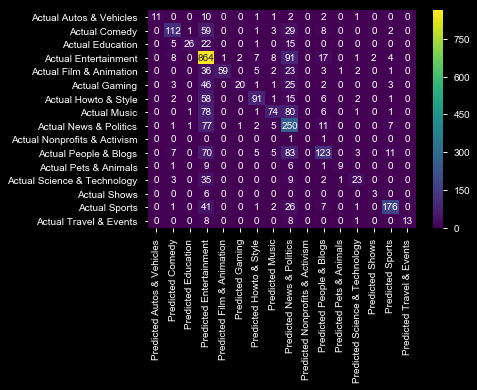

In [54]:
plot_confusion_matrix(y_val, y_pred_val);

## Multiclass Classification Report
### Since a multiclass ROC/AUC from the library is not possible 

In [55]:
from scipy import interp
from sklearn.metrics import classification_report
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [56]:
report_with_auc = class_report(y_true=y_val, y_pred=y_pred_val, y_score=pipeline.predict_proba(X_val))

print(report_with_auc)

                      precision  recall  f1-score   support      pred    AUC
Autos & Vehicles         1.0000  0.3929    0.5641   28.0000   11.0000 0.9722
Comedy                   0.7832  0.5209    0.6257  215.0000  143.0000 0.9009
Education                0.8966  0.3768    0.5306   69.0000   29.0000 0.8448
Entertainment            0.6089  0.8597    0.7129 1005.0000 1419.0000 0.8876
Film & Animation         0.9833  0.4470    0.6146  132.0000   60.0000 0.8340
Gaming                   0.8696  0.1980    0.3226  101.0000   23.0000 0.8643
Howto & Style            0.7845  0.5170    0.6233  176.0000  116.0000 0.9497
Music                    0.7255  0.3058    0.4302  242.0000  102.0000 0.8913
News & Politics          0.3771  0.7042    0.4912  355.0000  663.0000 0.8894
People & Blogs           0.6508  0.4007    0.4960  307.0000  189.0000 0.5343
Pets & Animals           0.8182  0.3462    0.4865   26.0000   11.0000 0.5628
Science & Technology     0.6571  0.3151    0.4259   73.0000   35.0000 0.6009

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


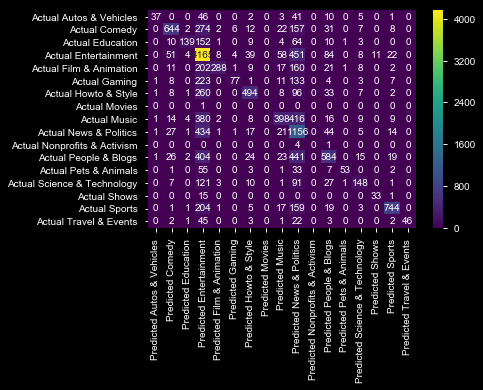

In [57]:
#Test Set Predict and Confusion Matrix

y_pred_x = pipeline.predict(X_test)
y_pred_proba_x  = pipeline.predict_proba(X_test)
accuracy_score(y_test, y_pred_x)
plot_confusion_matrix(y_test, y_pred_x);

In [58]:
labels = df.category_names.tolist()

## Naive Bayes Classification

In [75]:
from sklearn.naive_bayes import MultinomialNB

pipeline = make_pipeline(
    ce.OrdinalEncoder(cols = cats),
    MultinomialNB(alpha=.01)
    
)

# Fit on train, score on val, predict on test
pipeline.fit(X_train, y_train)


# Predict and score the vectors
y_pred = pipeline.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, labels = labels, average='macro')

print('Total accuracy classification score: {}'.format(acc_score))
print('Total F1 classification score: {}'.format(f1_score))

ValueError: bad input shape (20264, 18)

In [72]:
plot_confusion_matrix(y_test, y_pred);

ValueError: multilabel-indicator is not supported

In [ ]:

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure(figsize=(16,9))
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Linear Naive Bayes Receiver operating characteristic for Class {i}')
    plt.legend(loc="lower right")
    plt.show()

## Linear Support Vector Model
###  In order to look at the AUC/ROC for a Multilabel Classification Problem, you have to convert your problem into binary by using OneVsAll approach so you'll have n_class number of ROC curves. 

In [ ]:
#map the class names to coded numbers

colums = {'Entertainment':0,'News & Politics':1,
'People & Blogs':2,'Music':3,'Sports':4,
'Comedy':5,'Howto & Style':6,
'Film & Animation':7,'Gaming':8,
 'Science & Technology':9,
 'Education':10,'Pets & Animals':11,
 'Autos & Vehicles':12,'Travel & Events':13,
 'Shows':14,'Nonprofits & Activism':15,'Movies':16}
target = 'category_names'
df4[target] = df4[target].map(colums)
df4[target].value_counts()

In [66]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

features = df4.columns


X = df4[features]

y = df4[target]

y = label_binarize(y, classes= range(18))
n_classes = 17

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

#encoder
enc = ce.OrdinalEncoder(cols=cats)
X_train = enc.fit_transform(X_train)
X_test = enc.fit_transform(X_test)

# classifier
clf = OneVsRestClassifier(LinearSVC(max_iter=10000, random_state=42))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\bas

In [ ]:

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure(figsize=(16,9))
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Linear SVM Receiver operating characteristic for Class {i}')
    plt.legend(loc="lower right")
    plt.show()